In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [167]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
# url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names=['sepal-length', 'sepal-width', 'petal-length','petal-width', 'class']

# dataset=pd.read_csv(url, names=names)

In [169]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [170]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [171]:
dataset=pd.DataFrame(iris.data, columns=iris.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [172]:
dataset.shape

(150, 4)

In [173]:
dataset['target']=iris.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [174]:
dataset[dataset.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [175]:
dataset[dataset.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [176]:
# X=dataset.iloc[:, :-1].values
# Y=dataset.iloc[:, 4].values
df0=dataset[:50]
df1=dataset[50:100]
df2=dataset[100:]

In [177]:
%matplotlib inline

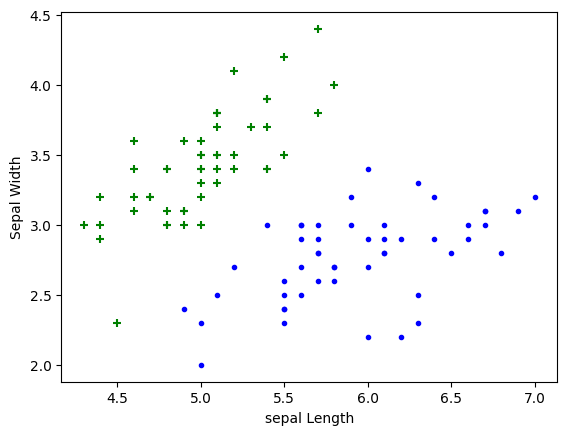

In [178]:
plt.xlabel('sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')


In [179]:
from sklearn.model_selection import train_test_split
X=dataset.drop(['target'], axis='columns')
y=dataset.target

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.20)

In [181]:
len(X_train)

120

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
len(X_test)

30

In [184]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, Y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [185]:
classifier.score(X_test, Y_test)

0.9666666666666667

In [186]:
# Y_pred=classifier.predict(X_test)

In [187]:
# for k in range(1,21):
#     knn=KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, Y_train)
#     print(k, knn.score(X_test, Y_test))

In [188]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred=classifier.predict(X_test)

cm= confusion_matrix(Y_test, Y_pred)

In [189]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(58.222222222222214, 0.5, 'Truth')

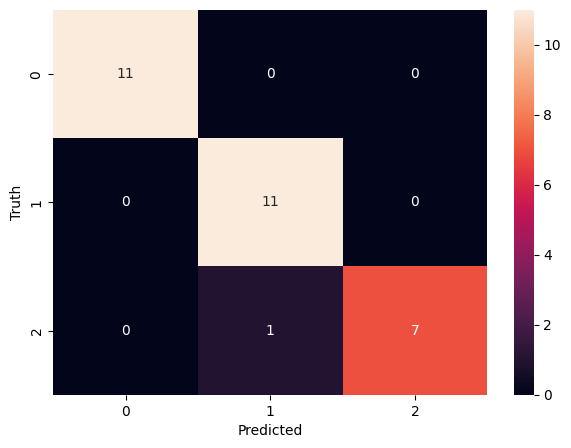

In [190]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [191]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

